In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pydot
import matplotlib.pyplot as plt

# Import tensorflow and keras
import tensorflow as tf
import keras

# For creating the model
from keras.models import Sequential
from keras.layers import Dense, Dropout

# For tuning the model
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# For Encoding
from sklearn.preprocessing import LabelEncoder

# For splitting 
from sklearn.model_selection import train_test_split

# For scaling
from sklearn.preprocessing import StandardScaler

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


**Importing files from local disk.**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Breast_cancer.csv to Breast_cancer (3).csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Breast_cancer.csv']))

In [4]:
print(df.shape)
df.head(10)

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


**Data cleaning process.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df = df.drop('Unnamed: 32', axis = 'columns')

In [8]:
encoder = LabelEncoder()

In [9]:
df_New = df.apply(LabelEncoder().fit_transform)

In [10]:
df_New.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,41,1,370,1,455,452,444,531,521,526,416,483,525,169,520,515,277,489,460,400,439,489,425,41,497,516,358,516,520,483,485,506
1,42,1,426,186,486,513,120,215,321,396,219,91,424,91,396,450,145,135,177,336,81,309,419,199,465,511,158,210,278,401,222,375
2,488,1,406,324,478,487,403,459,478,516,348,184,481,117,458,476,257,455,368,465,343,407,399,261,455,491,287,464,438,468,445,361
3,489,1,98,297,164,95,471,533,507,493,426,498,404,278,400,281,451,526,469,450,495,523,215,298,281,194,408,524,511,479,499,533
4,490,1,418,60,493,506,332,414,480,492,216,147,484,114,485,477,509,319,471,453,208,446,381,28,453,470,239,245,415,363,81,216


**Dividing the dataset into X (independent columns) and y (dependent columns).**

In [11]:
y = np.array(df_New['diagnosis'])
y = y.reshape(-1,1)

In [12]:
X = df_New.iloc[:, df_New.columns != 'diagnosis']

In [13]:
X.head(10)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,41,370,1,455,452,444,531,521,526,416,483,525,169,520,515,277,489,460,400,439,489,425,41,497,516,358,516,520,483,485,506
1,42,426,186,486,513,120,215,321,396,219,91,424,91,396,450,145,135,177,336,81,309,419,199,465,511,158,210,278,401,222,375
2,488,406,324,478,487,403,459,478,516,348,184,481,117,458,476,257,455,368,465,343,407,399,261,455,491,287,464,438,468,445,361
3,489,98,297,164,95,471,533,507,493,426,498,404,278,400,281,451,526,469,450,495,523,215,298,281,194,408,524,511,479,499,533
4,490,418,60,493,506,332,414,480,492,216,147,484,114,485,477,509,319,471,453,208,446,381,28,453,470,239,245,415,363,81,216
5,43,159,107,223,200,463,477,440,423,355,470,278,159,246,280,372,406,357,274,328,444,238,206,309,308,394,492,472,380,466,516
6,44,376,282,445,458,251,333,374,402,207,114,383,109,379,414,64,149,228,236,74,126,387,326,457,475,286,325,394,408,335,328
7,491,233,313,308,293,446,465,335,362,388,465,440,352,425,407,437,374,248,368,112,456,291,343,343,371,369,419,305,349,373,498
8,45,192,349,280,243,462,497,469,468,407,459,242,218,282,247,209,423,351,299,321,336,240,395,322,305,380,495,475,432,483,485
9,492,160,407,238,196,445,524,501,436,339,490,233,417,209,242,341,524,501,365,214,529,224,502,270,295,399,528,536,452,482,534


**Splitting the dataset for training, testing and for validation.**

In [14]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state = 42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)

**Scaling of the dataset using StandardScaler.**

In [15]:
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

**This is to generate the same result whenever we re-run this model.**

In [17]:
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
X_train.shape

(319, 31)

**Creation and compilation the ANN model**

In [29]:
model = Sequential()

model.add(Dense(32, input_shape = (31, ), name = 'Input'))
model.add(Dense(64, activation = 'relu', kernel_initializer='he_normal', name = 'Dense_1'))
model.add(Dense(128, activation = 'relu', kernel_initializer='he_normal', name = 'Dense_2'))
model.add(Dropout(0.3))                                                                       # Dropout command is used to remove the randomly selected neurons during training so as to prevent overfitting.
 
model.add(Dense(200, activation = 'relu', kernel_initializer='he_normal', name = 'Dense_3'))
model.add(Dense(400, activation = 'relu', kernel_initializer='he_normal', name = 'Dense_4'))
model.add(Dense(200, activation = 'relu', kernel_initializer='he_normal', name = 'Dense_5'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu',  name = 'Dense_6'))
model.add(Dense(64, activation='relu',  name = 'Dense_7'))
model.add(Dense(32, activation='relu',  name = 'Dense_8'))
model.add(Dropout(0.3))

model.add(Dense(10, activation = 'softmax',kernel_initializer='he_normal', name = 'Output'))


model.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
              optimizer = keras.optimizers.Adam(learning_rate = 0.001),
              metrics = [keras.metrics.SparseCategoricalAccuracy()]
              )

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (Dense)                (None, 32)                1024      
_________________________________________________________________
Dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
Dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
Dense_3 (Dense)              (None, 200)               25800     
_________________________________________________________________
Dense_4 (Dense)              (None, 400)               80400     
_________________________________________________________________
Dense_5 (Dense)              (None, 200)              

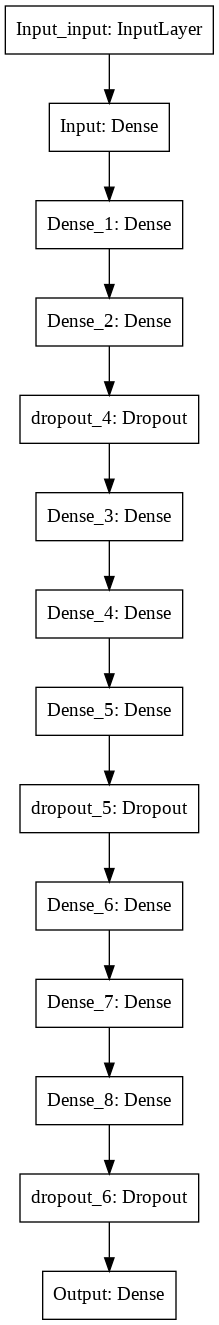

In [32]:
keras.utils.plot_model(model) # Using pydot library

In [33]:
weights, biases = model.layers[1].get_weights()

In [34]:
weights # for layer 1

array([[-0.07877737, -0.20544857, -0.36547583, ..., -0.05577512,
         0.06042426, -0.20284505],
       [ 0.050933  , -0.40838134, -0.13165256, ..., -0.34201273,
        -0.08049174, -0.27506712],
       [-0.4315302 , -0.33437318, -0.54753834, ...,  0.09780499,
        -0.22906283, -0.23786134],
       ...,
       [-0.15754391, -0.05666383, -0.3598577 , ..., -0.35720354,
         0.0223857 ,  0.3880292 ],
       [ 0.15629692,  0.40645972, -0.0403233 , ..., -0.15107577,
        -0.4883551 ,  0.1548398 ],
       [-0.20485306, -0.07597453, -0.5501524 , ..., -0.25558713,
        -0.00375694, -0.0356092 ]], dtype=float32)

In [35]:
weights.shape

(32, 64)

In [36]:
print(biases.shape)
biases

(64,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [54]:
model_history = model.fit(X_train, y_train, epochs = 60, validation_data=(X_valid, y_valid), batch_size = 64, verbose = 2)

Train on 319 samples, validate on 107 samples
Epoch 1/60
 - 0s - loss: 0.0062 - sparse_categorical_accuracy: 0.9969 - val_loss: 0.2763 - val_sparse_categorical_accuracy: 0.9720
Epoch 2/60
 - 0s - loss: 0.0029 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.3024 - val_sparse_categorical_accuracy: 0.9720
Epoch 3/60
 - 0s - loss: 0.0142 - sparse_categorical_accuracy: 0.9969 - val_loss: 0.3181 - val_sparse_categorical_accuracy: 0.9720
Epoch 4/60
 - 0s - loss: 0.0049 - sparse_categorical_accuracy: 0.9969 - val_loss: 0.3208 - val_sparse_categorical_accuracy: 0.9720
Epoch 5/60
 - 0s - loss: 0.0026 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.2841 - val_sparse_categorical_accuracy: 0.9720
Epoch 6/60
 - 0s - loss: 0.0019 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.2677 - val_sparse_categorical_accuracy: 0.9813
Epoch 7/60
 - 0s - loss: 0.0087 - sparse_categorical_accuracy: 0.9969 - val_loss: 0.2743 - val_sparse_categorical_accuracy: 0.9813
Epoch 8/60
 - 0s - loss: 9.5724e-04 -

In [55]:
mae_test = model.evaluate(X_test, y_test)
mae_test
print('Loss = ', mae_test[0])
print('Accuracy = ', mae_test[1]*100)

143/143 [==============================] - 0s 135us/step
Loss =  0.26177316695585634
Accuracy =  97.90209531784058


In [56]:
history = model_history.history

**The graph is used to check whether convergence is achived or not.**

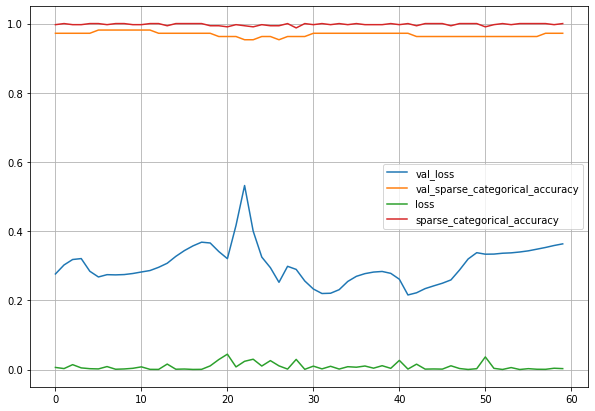

In [57]:
pd.DataFrame(history).plot(figsize = (10, 7))
plt.gca()
plt.grid(True)
plt.show()

In [41]:
y_pred = model.predict(X_test)
print(y_pred)

[[1.09151199e-01 8.08850944e-01 3.30009894e-03 ... 1.47580476e-02
  1.77303124e-02 1.04192887e-02]
 [5.35675589e-18 1.00000000e+00 1.20782197e-25 ... 2.17106321e-19
  7.60438121e-23 1.35915584e-19]
 [7.62569369e-18 1.00000000e+00 1.92062683e-25 ... 3.00807745e-19
  1.07334321e-22 1.78049412e-19]
 ...
 [1.00000000e+00 7.70734169e-19 3.32520720e-35 ... 1.07401687e-26
  9.26583973e-21 8.02839846e-30]
 [4.12051700e-28 1.00000000e+00 0.00000000e+00 ... 3.32028479e-30
  1.03983704e-35 1.34619155e-30]
 [1.00000000e+00 1.53416514e-30 0.00000000e+00 ... 0.00000000e+00
  1.11549804e-33 0.00000000e+00]]


**Tuning of ANN model**

In [44]:

def build_classifier(optimizer, learn_rate, activation):
  classifier = Sequential()

  classifier.add(Dense(32, input_shape = (31, ), name = 'Input'))
  classifier.add(Dense(64, activation = 'relu', kernel_initializer='he_normal', name = 'Dense_1'))
  classifier.add(Dense(128, activation = 'relu', kernel_initializer='he_normal', name = 'Dense_2'))
  classifier.add(Dropout(0.3))

  classifier.add(Dense(200, activation = 'relu', kernel_initializer='he_normal', name = 'Dense_3'))
  classifier.add(Dense(400, activation = 'relu', kernel_initializer='he_normal', name = 'Dense_4'))
  classifier.add(Dense(200, activation = 'relu', kernel_initializer='he_normal', name = 'Dense_5'))
  classifier.add(Dropout(0.3))

  classifier.add(Dense(128, activation='relu',  name = 'Dense_6'))
  classifier.add(Dense(64, activation='relu',  name = 'Dense_7'))
  classifier.add(Dense(32, activation='relu',  name = 'Dense_8'))
  classifier.add(Dropout(0.3))

  classifier.add(Dense(10, activation = 'softmax',kernel_initializer='he_normal', name = 'Output'))


  classifier.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
              optimizer = keras.optimizers.Adam(learning_rate = 0.001),
              metrics = [keras.metrics.SparseCategoricalAccuracy()]
              )
  
  return classifier

In [45]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 60, batch_size = 64, verbose = 2)

In [46]:
parameters = {'optimizer':['Adam', 'RMSprop'],
              'learn_rate': [0.001, 0.01, 0.1],
              'epochs': [40,60,100],
              'activation': ['relu', 'elu']
              }

grid = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', n_jobs = -1, cv = 3, verbose = 2)

In [47]:
grid_result = grid.fit(X_test, y_test)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  5.0min finished


Epoch 1/40
 - 0s - loss: 1.8359 - sparse_categorical_accuracy: 0.3427
Epoch 2/40
 - 0s - loss: 1.0978 - sparse_categorical_accuracy: 0.4965
Epoch 3/40
 - 0s - loss: 1.0349 - sparse_categorical_accuracy: 0.5734
Epoch 4/40
 - 0s - loss: 0.6497 - sparse_categorical_accuracy: 0.7413
Epoch 5/40
 - 0s - loss: 0.5920 - sparse_categorical_accuracy: 0.7622
Epoch 6/40
 - 0s - loss: 0.3729 - sparse_categorical_accuracy: 0.8811
Epoch 7/40
 - 0s - loss: 0.2918 - sparse_categorical_accuracy: 0.8881
Epoch 8/40
 - 0s - loss: 0.1669 - sparse_categorical_accuracy: 0.9510
Epoch 9/40
 - 0s - loss: 0.2163 - sparse_categorical_accuracy: 0.9371
Epoch 10/40
 - 0s - loss: 0.1283 - sparse_categorical_accuracy: 0.9720
Epoch 11/40
 - 0s - loss: 0.1346 - sparse_categorical_accuracy: 0.9580
Epoch 12/40
 - 0s - loss: 0.0707 - sparse_categorical_accuracy: 0.9860
Epoch 13/40
 - 0s - loss: 0.0703 - sparse_categorical_accuracy: 0.9720
Epoch 14/40
 - 0s - loss: 0.0524 - sparse_categorical_accuracy: 0.9930
Epoch 15/40
 - 

In [48]:
grid_result.best_estimator_

In [52]:
grid_result.best_params_

{'activation': 'elu', 'epochs': 40, 'learn_rate': 0.01, 'optimizer': 'RMSprop'}

In [53]:
grid_result.best_score_

0.9861111111111112

In [51]:
score_after_Tunning = round((grid_result.best_score_)*100, 4)
score_after_Tunning

98.6111

**Before tuning the model, accuracy was 97.90 %.**

**After tuning the model, accuracy is 98.61 %**